### 2021_10_25_2

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('../CSV/bike-sharing-demand/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


../CSV/bike-sharing-demand/sampleSubmission.csv
../CSV/bike-sharing-demand/test.csv
../CSV/bike-sharing-demand/train.csv


In [2]:
train = pd.read_csv("../CSV/bike-sharing-demand/train.csv",parse_dates=['datetime'])
test = pd.read_csv("../CSV/bike-sharing-demand/test.csv",parse_dates=['datetime'])
sub = pd.read_csv("../CSV/bike-sharing-demand/sampleSubmission.csv")

print("train shape : {}".format(train.shape))
print("test shape : {}".format(test.shape))
print("sub shape : {}".format(sub.shape))

train shape : (10886, 12)
test shape : (6493, 9)
sub shape : (6493, 2)


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
f_names = ["temp", "atemp"]
X_train_all = train[f_names]
X_test_all = test[f_names]

y_train_all = train["count"]

X_train, X_test, y_train, y_test = train_test_split(X_train_all, y_train_all, test_size = 0.3, random_state = 77)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)
model.predict(X_test)

# 결정계수 확인
print("학습용 세트 결정계수: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 결정계수: {:.3f}".format(model.score(X_test, y_test)))

학습용 세트 결정계수: 0.159
테스트 세트 결정계수: 0.146


### 여러개의 변수 사용하기

In [11]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [12]:
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


In [13]:
f_names = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']
X_train_all = train[f_names]         # 학습용 데이터의 변수 선택 
X_test_all = test[f_names]       # 테스트 데이터의 변수 선택 

y_train_all = train['count']

### 데이터 나누기

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_train_all, 
                                                    y_train_all, 
                                                    test_size = 0.3, 
                                                    random_state = 77)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)
model.predict(X_test)

# 결정계수 확인
print("학습용 세트 결정계수: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 결정계수: {:.3f}".format(model.score(X_test, y_test)))

학습용 세트 결정계수: 0.262
테스트 세트 결정계수: 0.257


### MinMaxScaler

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

In [18]:
f_names = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 
           'humidity', 'windspeed']
X_tr_all = train[f_names]         # 학습용 데이터의 변수 선택 

In [19]:
scaler = MinMaxScaler().fit(X_tr_all)
nor_X_tr_all = scaler.transform(X_tr_all)
X_test_all = test[f_names]       # 테스트 데이터의 변수 선택 

y_tr_all = train['count']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(nor_X_tr_all, 
                                                    y_tr_all,
                                                    test_size=0.3,
                                                    random_state=77)

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)
# 정확도 확인
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

학습용 세트 정확도: 0.262
테스트 세트 정확도: 0.257


### Ridge, Lasso

In [23]:
from sklearn.linear_model import Ridge, Lasso

In [24]:
model = Ridge()
model.fit(X_train, y_train)
# 정확도 확인
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

학습용 세트 정확도: 0.262
테스트 세트 정확도: 0.257


In [25]:
model = Lasso()
model.fit(X_train, y_train)
# 정확도 확인
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

학습용 세트 정확도: 0.258
테스트 세트 정확도: 0.254


<AxesSubplot:>

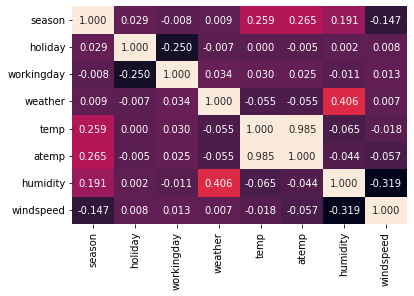

In [26]:
import seaborn as sns
sns.heatmap(X_tr_all.corr(), annot=True, fmt=".3f", cbar=False)

In [29]:
print("원래 데이터 : ", X_tr_all.shape)

nor_X = MinMaxScaler().fit_transform(X_tr_all)  # 입력 데이터 정규화
ex_X = PolynomialFeatures(degree=2, include_bias = False).fit_transform(nor_X)  # 데이터 feature 추가 생성

print("정규화, 추가 생성 : ", ex_X.shape, y_tr_all.shape)
print(type(X_tr_all), type(ex_X))

원래 데이터 :  (10886, 8)
정규화, 추가 생성 :  (10886, 44) (10886,)
<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


In [30]:
X_train, X_test, y_train, y_test = train_test_split(ex_X, 
                                                    y_tr_all,
                                                    test_size=0.3,
                                                    random_state=77)

In [34]:
from sklearn.neighbors import KNeighborsRegressor

### 여러 모델 확인해보기

In [35]:
model_list = [LinearRegression(), Ridge(), Lasso(), KNeighborsRegressor()]

for model in model_list:
    model.fit(X_train, y_train)
    
    print("모델 : ", model)
    # 정확도 확인
    print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
    print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

모델 :  LinearRegression()
학습용 세트 정확도: 0.307
테스트 세트 정확도: 0.305
모델 :  Ridge()
학습용 세트 정확도: 0.302
테스트 세트 정확도: 0.304
모델 :  Lasso()
학습용 세트 정확도: 0.264
테스트 세트 정확도: 0.260
모델 :  KNeighborsRegressor()
학습용 세트 정확도: 0.533
테스트 세트 정확도: 0.302


In [36]:
### 최종 모델 확인
model = LinearRegression()
model.fit(X_train, y_train)
scaler = MinMaxScaler().fit(X_tr_all)
nor_X_test_all = scaler.transform(X_test_all)
ex_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(nor_X_test_all)

In [37]:
pred = model.predict(ex_X)
sub['count'] = pred
sub.loc[ sub['count'] < 0  , 'count' ] = 0

In [39]:
sub.to_csv("../CSV/bike-sharing-demand/02_sub.csv", index = False)